# Times Higher Education University Rankings Exploring Relationships

## 1. Importing Libraries and cleaned dataset

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

### Importing combined dataset

In [2]:
# Set path variable

path = r'C:\Users\HP\Documents\CareerFoundry\Data Immersion\Achievement 6\World University Rankings Analysis'

In [3]:
# Import dataset

df_times = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'times_cleaned_final.csv'))

In [4]:
# Check to see if dataset was imported properly

df_times

,Unnamed: 0,world_rank_Times,university_name,country,teaching_score,international_outlook_score,research_score,citations_score,income_score,overall_score_Times,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011
1,1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,0.27,0.4925373134328358,2011
2,2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,0.33,0.5873015873015873,2011
3,3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,0.22,0.7241379310344828,2011
4,4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,0.27,0.8181818181818182,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,NaN,21958.0,15.3,0.03,0.9230769230769231,2016
2599,2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,NaN,31268.0,28.7,0.02,0.5625,2016
2600,2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,NaN,4122.0,3.7,0.03,NaN,2016
2601,2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,NaN,10117.0,12.1,0.08,0.3888888888888889,2016


In [5]:
df_times.shape

(2603, 15)

## 2. Use the questions from the previous exercise to pick out variables suitable for the exploratory visual analysis

#### The goal for this visual analysis is to see which factor(s) correlate most strongly with high university rankings (the world_rank_Times column)

In [6]:
# Check datatypes of the columns. Correlations will only work with numerical columns

df_times.dtypes

Unnamed: 0                       int64
world_rank_Times                object
university_name                 object
country                         object
teaching_score                 float64
international_outlook_score    float64
research_score                 float64
citations_score                float64
income_score                   float64
overall_score_Times            float64
num_students                   float64
student_staff_ratio            float64
international_students         float64
female_male_ratio               object
year                             int64
dtype: object

In [7]:
# Drop the 'Unnamed: 0' column as this was an automatically generated index column

df_times = df_times.drop(columns = ['Unnamed: 0'])

In [8]:
# Can drop the 'university name' and 'country' columns for this since they are object columns.
# For the numerical columns, the 'overall_score_Times', and 'year' columns can be omitted.
# Create a subset that does not include these 4 columns

df_times_sub1 = df_times.drop(columns = ['university_name', 'country', 'overall_score_Times', 'year'])

df_times_sub1

,world_rank_Times,teaching_score,international_outlook_score,research_score,citations_score,income_score,num_students,student_staff_ratio,international_students,female_male_ratio
0,1,99.7,72.4,98.7,98.8,34.5,20152.0,8.9,0.25,NaN
1,2,97.7,54.6,98.0,99.9,83.7,2243.0,6.9,0.27,0.4925373134328358
2,3,97.8,82.3,91.4,99.9,87.5,11074.0,9.0,0.33,0.5873015873015873
3,4,98.3,29.5,98.1,99.2,64.3,15596.0,7.8,0.22,0.7241379310344828
4,5,90.9,70.3,95.4,99.9,NaN,7929.0,8.4,0.27,0.8181818181818182
...,...,...,...,...,...,...,...,...,...,...
2598,601-800,18.6,24.3,10.9,26.5,35.4,21958.0,15.3,0.03,0.9230769230769231
2599,601-800,14.5,14.9,7.6,19.3,44.0,31268.0,28.7,0.02,0.5625
2600,601-800,24.0,16.1,10.2,36.4,37.9,4122.0,3.7,0.03,NaN
2601,601-800,20.1,23.3,16.0,13.5,40.4,10117.0,12.1,0.08,0.3888888888888889


### ** Analysis in the next major steps has been performed with all of the universities regardless of rank. However, this has led to too many data points in scatterplots, pairplots, and catplots and made graphs difficult to interpret. As a result, analysis will be performed with a subset of the data (top 200 universities per year). Note that some universities were also tied in rankings (ex: 3 universities held the 197th position in 2012)

In [9]:
# Create a subset of the top 200 universities per year
# Check the size of the subset (should be 1201 rows only)

df_top200 = df_times_sub1[~df_times_sub1['world_rank_Times'].str.contains("-")]

df_top200.shape

(1201, 10)

In [12]:
# Upon further investigation, the 'world_rank_Times' column doesn't only contain integers. There are some values that are strings such as "=39"
#Remove all the equal signs in order to convert the column to integers


contain_values = df_top200[df_top200['world_rank_Times'].str.contains('=')]

contain_values

,world_rank_Times,teaching_score,international_outlook_score,research_score,citations_score,income_score,num_students,student_staff_ratio,international_students,female_male_ratio
1841,=39,56.9,42.9,69.8,98.7,56.7,27233.0,6.5,0.11,0.9230769230769231
1842,=39,52.6,61.5,66.0,99.2,90.4,22020.0,27.3,0.11,1.0833333333333333
1846,=44,60.1,58.4,72.7,84.3,57.3,35364.0,13.9,0.13,1.173913043478261
1847,=44,64.6,99.5,72.8,70.1,53.7,19835.0,17.6,0.38,1.127659574468085
1849,=47,73.3,39.5,83.0,58.8,100.0,39763.0,13.7,0.10,0.47058823529411764
...,...,...,...,...,...,...,...,...,...,...
1993,=190,34.1,60.0,29.3,83.3,46.8,13216.0,17.4,0.19,1.173913043478261
1995,=193,25.0,99.8,26.7,84.8,38.1,5144.0,15.9,0.52,1.0
1996,=193,49.4,47.8,52.4,47.1,46.4,50657.0,21.4,0.09,0.8867924528301887
1998,=196,30.9,84.3,27.5,81.5,34.7,20174.0,15.2,0.29,1.0


In [13]:
# Upon further investigation, the 'world_rank_Times' column doesn't only contain integers. There are some values that are strings such as "=39"
# Remove all the equal signs in order to convert the column to integers
# Change the dtype of the column

df_top200['world_rank_Times'] = df_top200['world_rank_Times'].str.replace("=", "")

df_top200['world_rank_Times'] = df_top200['world_rank_Times'].astype('int')

df_top200.dtypes

C:\Users\HP\AppData\Local\Temp\ipykernel_4196\2671192632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top200['world_rank_Times'] = df_top200['world_rank_Times'].str.replace("=", "")
C:\Users\HP\AppData\Local\Temp\ipykernel_4196\2671192632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top200['world_rank_Times'] = df_top200['world_rank_Times'].astype('int')


world_rank_Times                 int32
teaching_score                 float64
international_outlook_score    float64
research_score                 float64
citations_score                float64
income_score                   float64
num_students                   float64
student_staff_ratio            float64
international_students         float64
female_male_ratio               object
dtype: object

## 3. Create a colored correlation matrix heatmap. Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [17]:
# Remove the female_male_ratio column since the correlation matrix can only handle numerical columns

df_top200_sub1 = df_top200.drop(columns = ['female_male_ratio'])

In [18]:
# Create a correlation matrix of the subset

df_top200_sub1.corr()

,world_rank_Times,teaching_score,international_outlook_score,research_score,citations_score,income_score,num_students,student_staff_ratio,international_students
world_rank_Times,1.000000,-0.807394,-0.094626,-0.831215,-0.515432,-0.224094,-0.080247,0.239386,-0.191540
teaching_score,-0.807394,1.000000,-0.075483,0.892144,0.221300,0.256737,0.104925,-0.296590,0.101561
international_outlook_score,-0.094626,-0.075483,1.000000,0.029172,0.067386,-0.034168,-0.197734,0.142392,0.780583
research_score,-0.831215,0.892144,0.029172,1.000000,0.190185,0.302848,0.177061,-0.170033,0.138193
citations_score,-0.515432,0.221300,0.067386,0.190185,1.000000,-0.151668,-0.173414,-0.208303,0.114017
income_score,-0.224094,0.256737,-0.034168,0.302848,-0.151668,1.000000,-0.070836,0.064875,-0.060818
num_students,-0.080247,0.104925,-0.197734,0.177061,-0.173414,-0.070836,1.000000,0.291358,-0.236888
student_staff_ratio,0.239386,-0.296590,0.142392,-0.170033,-0.208303,0.064875,0.291358,1.000000,-0.034478
international_students,-0.191540,0.101561,0.780583,0.138193,0.114017,-0.060818,-0.236888,-0.034478,1.000000


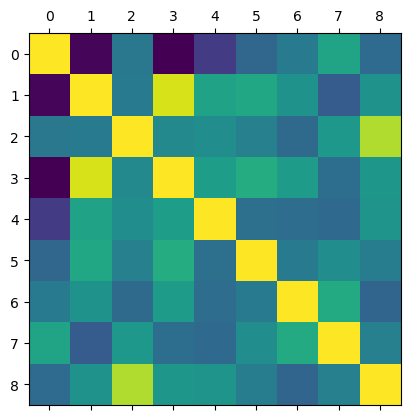

In [19]:
# Creating a correlation heatmap using matplotlib

plt.matshow(df_top200_sub1.corr())
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_4196\4020414807.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout() #set tight layout so figure doesn't get cut off when saving


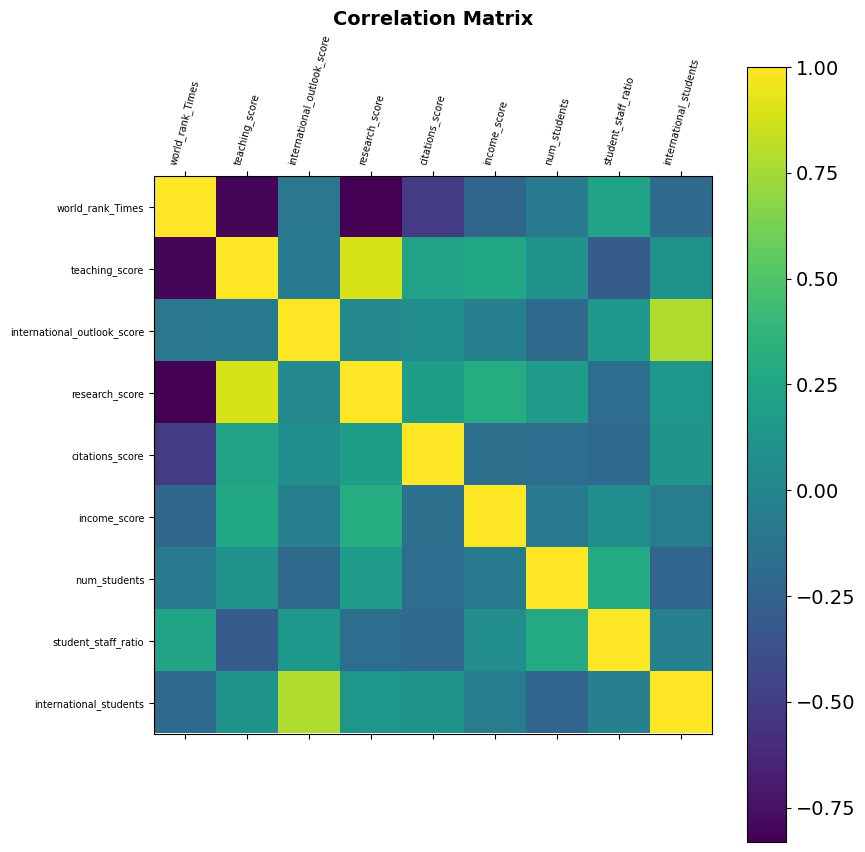

In [20]:
# Add labels, a legend, and change the size of the heatmap. Saving the figure to Visualizations folder. 

f = plt.figure(figsize=(9, 10)) # figure size 
plt.matshow(df_top200_sub1.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_top200_sub1.shape[1]), df_top200_sub1.columns, fontsize=7, rotation=75) # x axis labels
plt.yticks(range(df_top200_sub1.shape[1]), df_top200_sub1.columns, fontsize=7) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14, fontweight = 'bold') # add title
plt.tight_layout() #set tight layout so figure doesn't get cut off when saving

f.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_heatmap_times_top200_plt.png')) #save figure

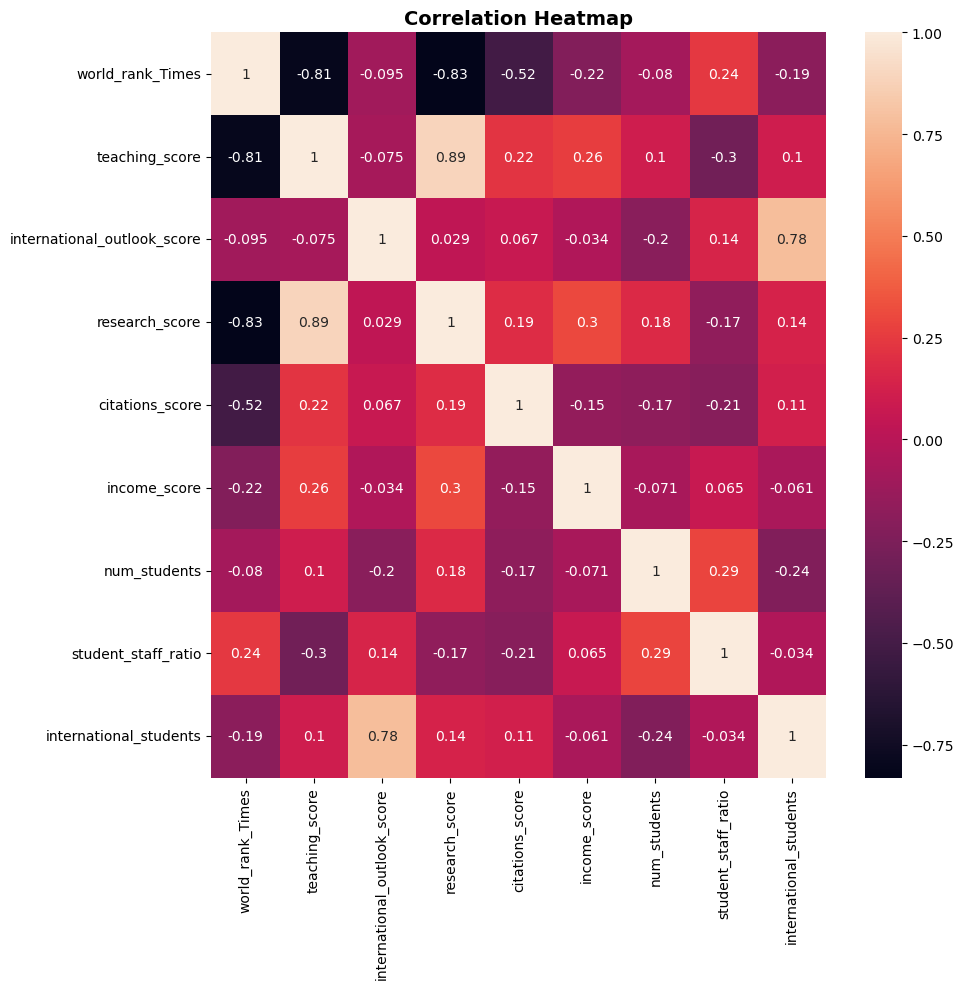

In [28]:
# Creating the same heatmap with seaborn instead of matplotlib

# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_top200_sub1.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

ax.set_title( "Correlation Heatmap" , size = 14, fontweight = 'bold') #add title

plt.tight_layout() #set tight layout so figure doesn't get cut off when saving

f.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_heatmap_times_top200_sns.png')) #save figure


Higher numbers inside the pixels indicate higher correlation coefficients which indicate a stronger relationship between variables. However, it is important to note that a high correlation coefficient doesn't necessarily mean that the variables are linearly dependent on each other or even dependent on each other at all. 

Interestingly, the world ranking based on the Times criteria has a very weak correlation with some of the direct factors that contribute to the score. The 'income score' and in particular the 'international outlook score' has very weak coefficients, which is surprising since it's expected that they should directly correlate with one another. Upon looking at the data, it appears that even some of the top universities do not have high international scores, which could be due to a variety of reasons (lack of international students or interest in attracting foreign students). 

Unlike the CWUR dataset, this dataset has additional information from schools (total number of students, student-to-staff ratio,  and even international student percentage). Based on the correlation matrix, however, the world ranking scores based on the Times criteria does not have a strong correlation with any of these factors (-0.08, 0.24, and -0.19 are fairly weak correlations). Further investigation of these trends is needed, since there could be large outliers affecting the data. 



## 4. Create a scatterplot(s) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output.

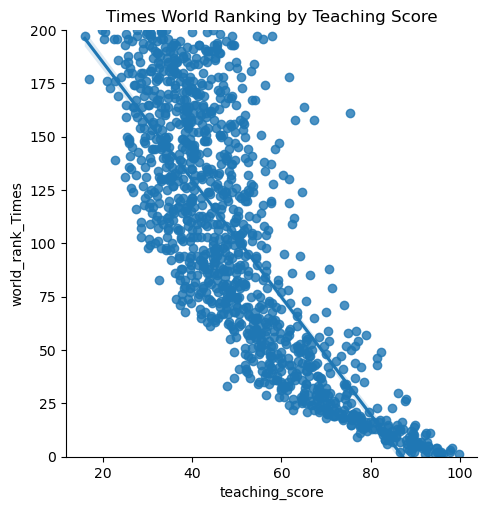

In [29]:
# Create a scatterplot for the "world_rank_Times" and "teaching_score" columns in seaborn
# Set the y-axis range since it goes into negative values for the world rankings which does not make sense

scat_1 = sns.lmplot(x = 'teaching_score', y = 'world_rank_Times', data = df_top200_sub1).set(title = 'Times World Ranking by Teaching Score')
scat_1.ax.set(ylim=(0, 200))

scat_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_worldrank_teachingscore_times_top200.png'), bbox_inches="tight") #save figure

As seen in the figure above, while there was a correlation coefficient of -0.81 between the two variables, the scatterplot shows that the data is not necessarily linear. Nevertheless, there is a clear negative trend which is to be expected, since higher ranked universities should have low ranking numbers but very high teaching scores. The data appears more clustered within roughly the top 30 universities, and the top 15 universities appear to have very high overall teaching scores. 

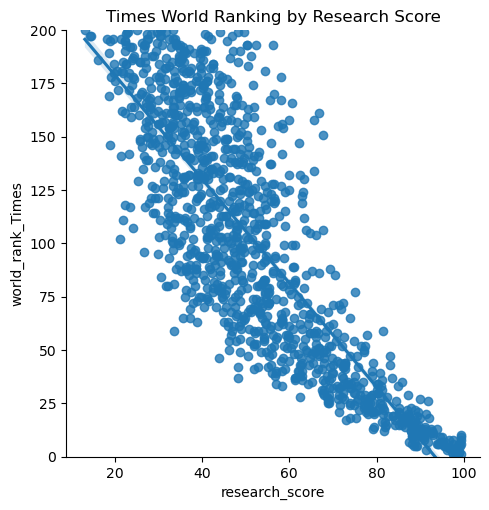

In [30]:
# Create a scatterplot for the "world_rank_Times" and "research_score" columns in seaborn

scat_2 = sns.lmplot(x = 'research_score', y = 'world_rank_Times', data = df_top200_sub1).set(title = 'Times World Ranking by Research Score')
scat_2.ax.set(ylim=(0, 200))

scat_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_worldrank_researchscore_times_top200.png'), bbox_inches="tight") #save figure

Compared to the previous figure, the correlation coefficient of -0.83 between these two variables showed a scatterplot with a slightly stronger general downward trend. The data appears to be slightly more spread out above the overall trend line. The data for this plot also appears to be slightly more linear than the previous plot. 

Once again, the data appears more clustered within roughly the top 30 universities, and the top 15 universities appear to have very high overall research scores.

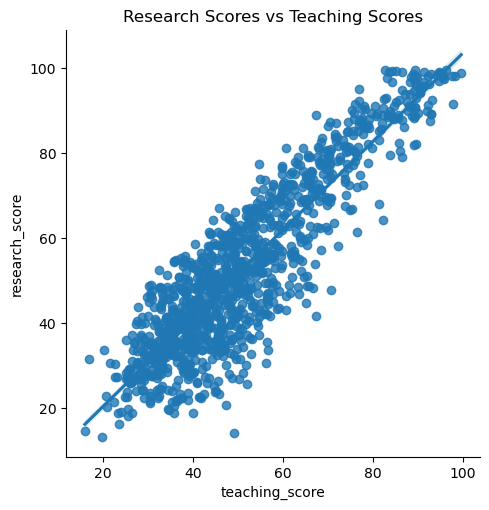

In [31]:
# Create a scatterplot for the "research_score" and "teaching_score" columns in seaborn

scat_3 = sns.lmplot(x = 'teaching_score', y = 'research_score', data = df_top200_sub1).set(title = 'Research Scores vs Teaching Scores')

scat_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_research_vs_teaching_times_top200.png'), bbox_inches="tight") #save figure

There is a general upward trend between the two, which suggests a confounding factor between the research scores and the teaching scores between universities. As one might expect, universities with better learning environments also tended to have a strong focus on research and publications. 

## 5. Create a pair plot of the entire dataset. Comment on the distribution of the variables and mark variables you'd like to explore further with an explanation of why.

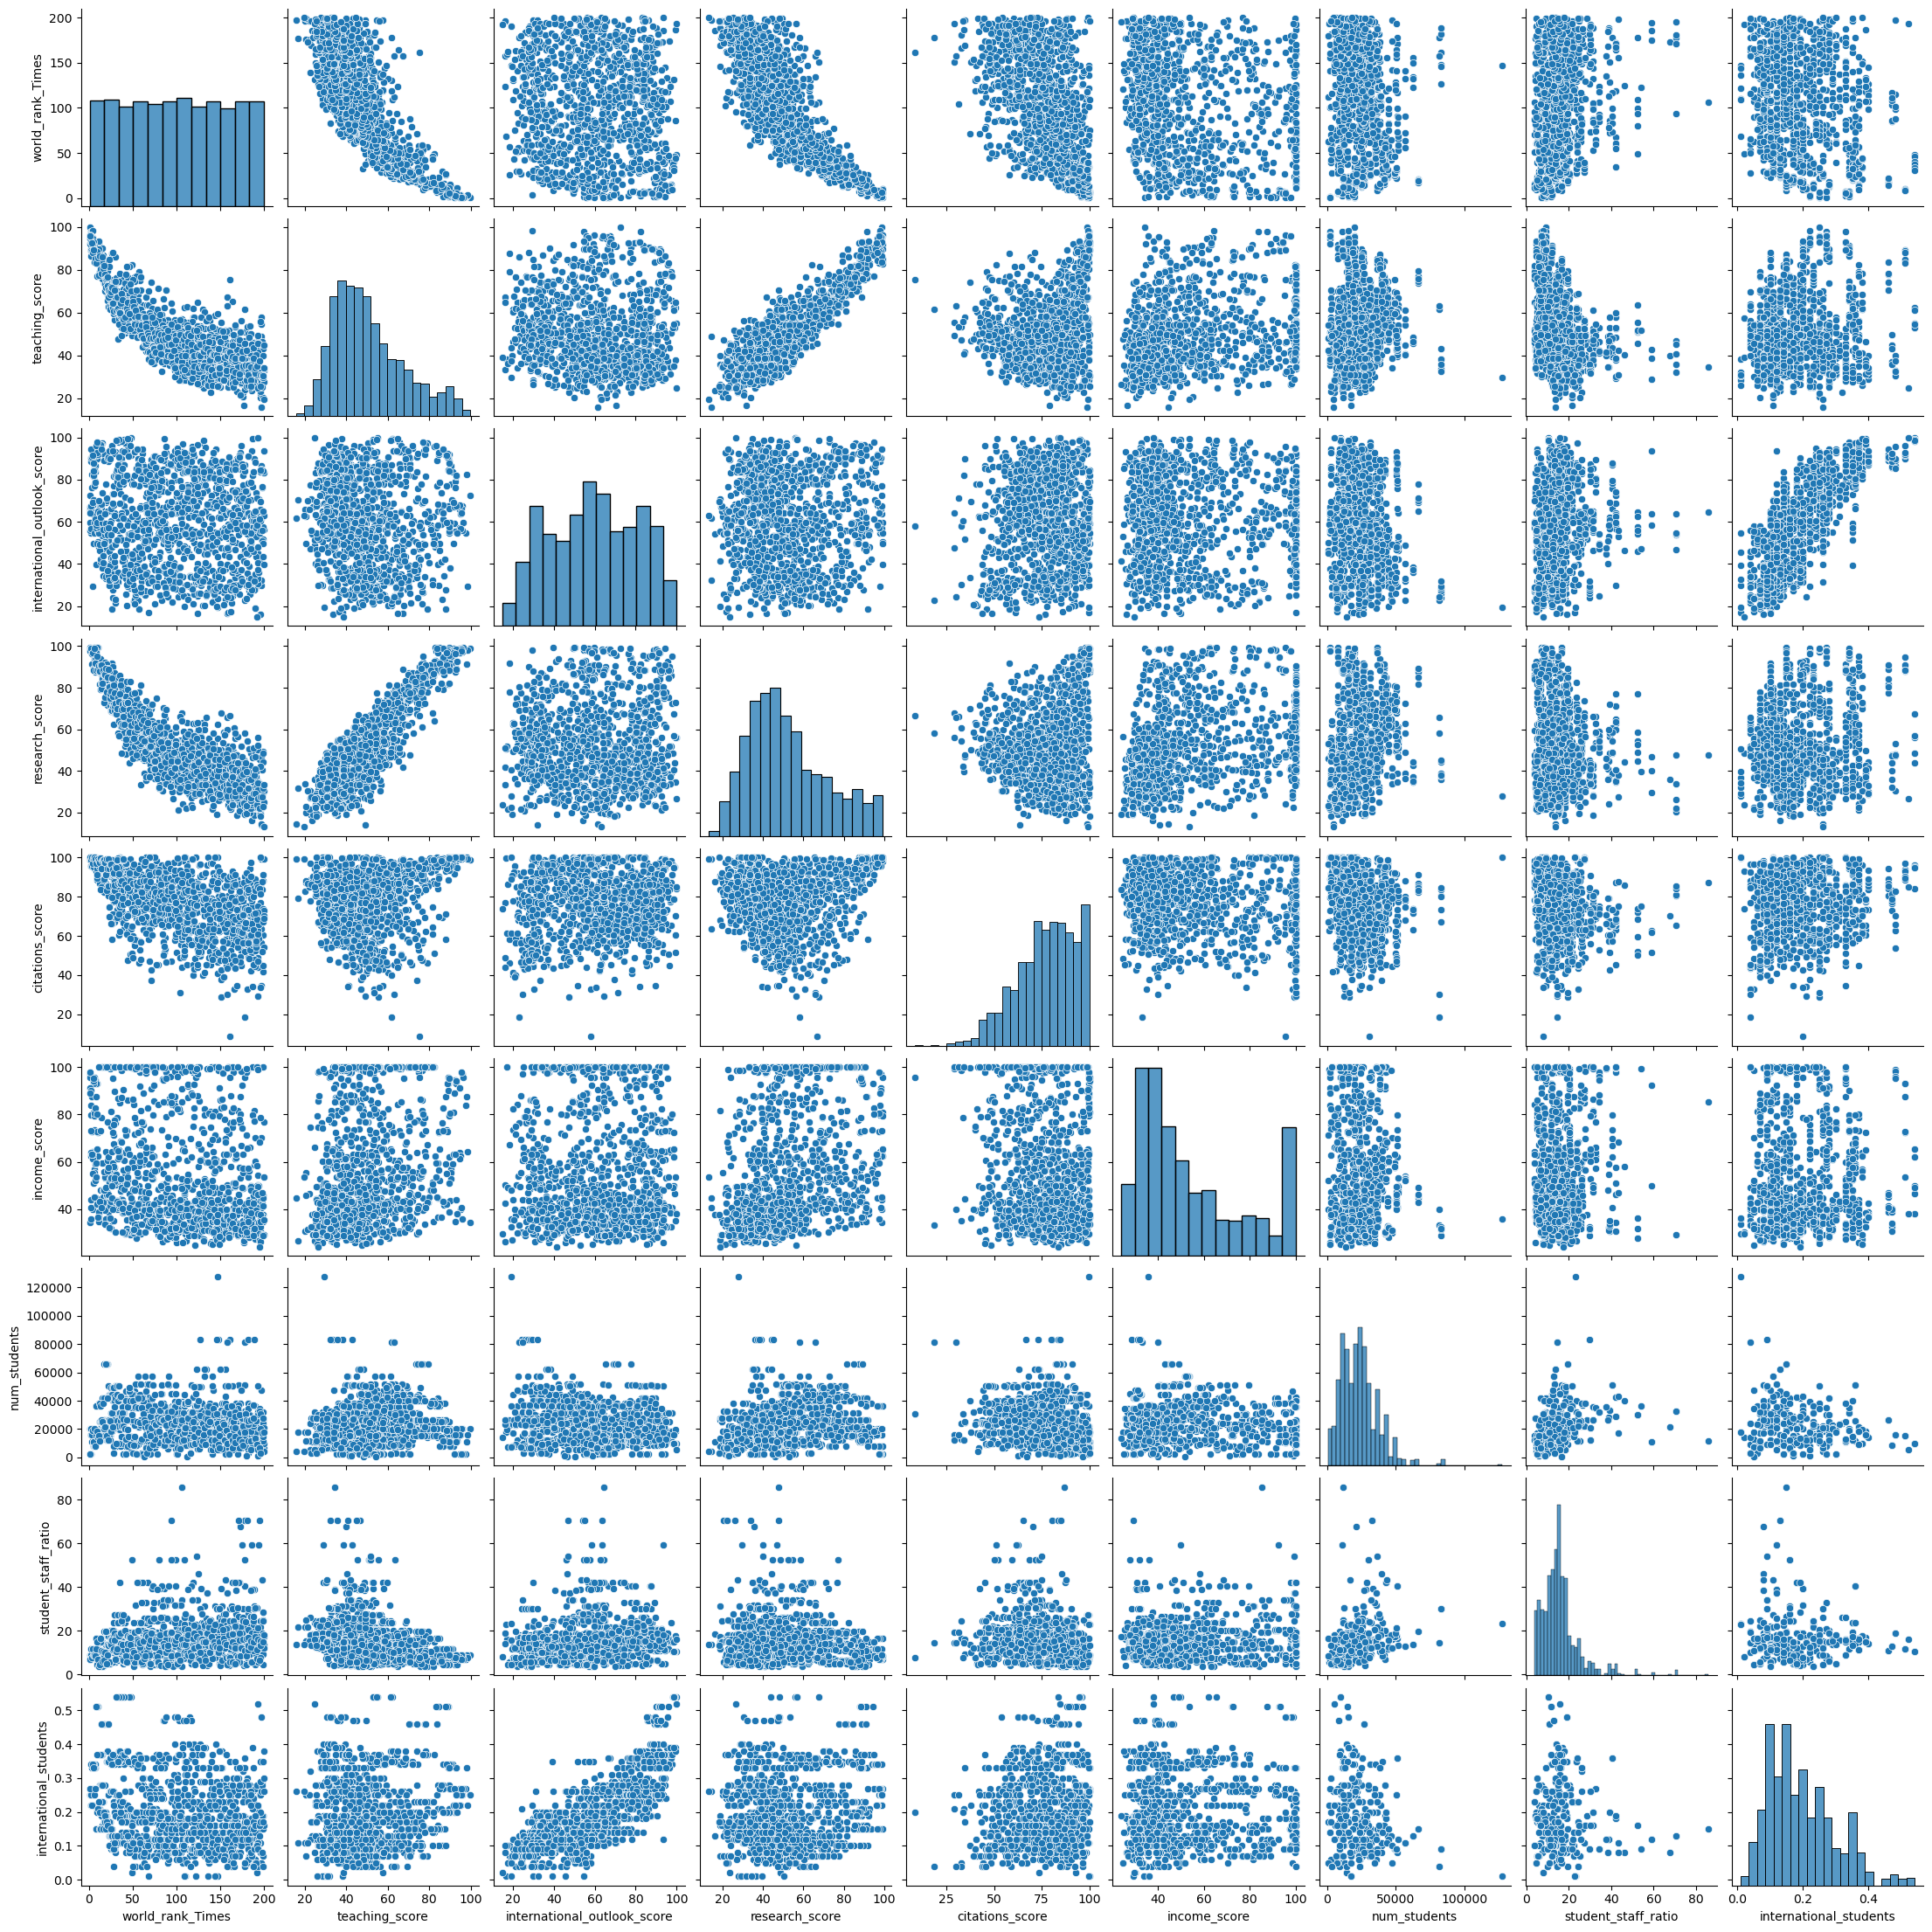

In [32]:
# Create a pair plot 

g = sns.pairplot(df_top200_sub1)

Unlike the CWUR data, many of the scatterplots for the top 200 universities seem to be spread out and a trend cannot be seen at first glance. This is likely due to the sheer amount of datapoints and also a significant number of missing values compared to the CWUR dataset. 

Some potential relationships to investigate in the future would be international_outlook_score vs international student percentage since the correlation heatmap showed a 0.78 correlation coefficient. Another possible pair of variables to investigate would be world rankings vs number of students, student staff ratio, or international student percentage. The data is likely skewed due to the sheer amount of datapoints but insights might be drawn if the sample size changed by year. 

## 6. Create a categorical plot and interpret the results.

In [33]:
# Check value counts to see number of universities in each country.
# The goal is to eventually compare number of top universities by region

df_top200_sub2 = df_times[~df_times['world_rank_Times'].str.contains("-")] # Create a subset of the original the top 200 with all columns
df_top200_sub2['world_rank_Times'] = df_top200_sub2['world_rank_Times'].str.replace("=", "") # Remove the '=' sign in front of some of the numbers
df_top200_sub2['world_rank_Times'] = df_top200_sub2['world_rank_Times'].astype('int') # Change the column type to an integer for graphing purposes

df_top200_sub2['country'].value_counts(dropna = False)

C:\Users\HP\AppData\Local\Temp\ipykernel_4196\1422332040.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top200_sub2['world_rank_Times'] = df_top200_sub2['world_rank_Times'].str.replace("=", "") # Remove the '=' sign in front of some of the numbers
C:\Users\HP\AppData\Local\Temp\ipykernel_4196\1422332040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top200_sub2['world_rank_Times'] = df_top200_sub2['world_rank_Times'].astype('int') # Change the column type to an integer for graphing purposes


United States of America    437
United Kingdom              186
Germany                      79
Netherlands                  69
Canada                       48
Australia                    45
Switzerland                  41
France                       36
Sweden                       32
Japan                        27
South Korea                  23
Belgium                      22
Hong Kong                    22
Denmark                      18
China                        18
Singapore                    12
Republic of Ireland          11
Israel                        9
Taiwan                        9
Spain                         8
Turkey                        7
Norway                        7
Austria                       7
South Africa                  6
New Zealand                   6
Finland                       6
Italy                         4
Brazil                        2
Russian Federation            2
Egypt                         1
Luxembourg                    1
Name: co

In [35]:
# Create a region column for the Top 200 universities

region = []

for value in df_top200_sub2['country']:
    if value in ['United States of America', 'Canada']:
         region.append('North America')
    elif value in ['Australia', 'New Zealand']:
         region.append('Oceania')
    elif value in ['South Africa', 'Egypt']:
         region.append('Africa')
    elif value in ['Brazil']:
         region.append('South America')
    elif value in ['Japan', 'South Korea', 'Hong Kong', 'China', 'Singapore', 'Israel', 'Taiwan', 'Turkey', 'Russian Federation']:
         region.append('Asia')
    else:
         region.append('Europe')
            
df_top200_sub2['region'] = region

df_top200_sub2['region'].value_counts(dropna = False)

C:\Users\HP\AppData\Local\Temp\ipykernel_4196\55226952.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top200_sub2['region'] = region


Europe           527
North America    485
Asia             129
Oceania           51
Africa             7
South America      2
Name: region, dtype: int64

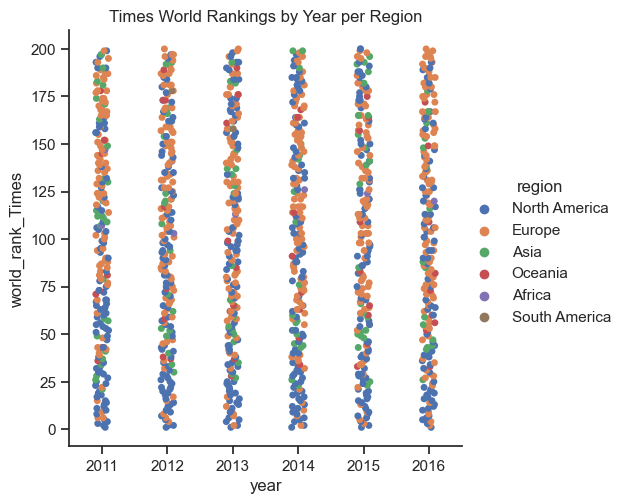

In [36]:
# Catplot for top 200

sns.set(style="ticks")
z_2 = sns.catplot(x="year", y="world_rank_Times", hue="region", data=df_top200_sub2).set(title = 'Times World Rankings by Year per Region')

Unlike the catplot for the CWUR dataset, the catplot for this dataset is much more diverse. This graph has universities from the USA as the majority in the top 50 every year like the CWUR graph, but this dataset has much more European universities within the top 200. In fact, there are even more European universities than North American universities overall, something which was not the case in the CWUR dataset. This is most likely due to the favorable criteria that the Times Rankings uses, which considers liberal arts more significantly compared to simply using math and sciences. 

In [37]:
# Save figure

z_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_world_rank_year_times_top200.png'), bbox_inches="tight")

## 7. Revisit the questions in the previous task and write answers to those based on the exploration conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration. 

Question 1: Which countries have the most/least top universities?

USA has the most universities in the top 200 by far. Egypt and Luxembourg both only have 1 university each. Going by region, however, Europe has has the largest number of top 200 universities followed closely by North America, whereas South America only has 2 universities in the top 200.

Question 2: Do higher numbers of top universities correlate to higher general rankings of countries?

I would need to find the average ranking of universities from each country in the top 200, which I have not completed yet. This can be done in a subsequent exercise.

Question 3: Which factors, if any, were more prevalent in top universities?

This is difficult to see based on the pairplot alone. However, based on the correlation matrix it appears that teaching, research, and citation scores appear to be the most correlated with the CWUR world rankings. 

Question 4: How did the rankings change over time? Did certain countries increase their numbers of
top universities? What factors caused this change?

These have not been completed yet since time analysis has not been completed. However, individual universities can be plotted over time to see how their respective rankings have changed. A more broad analysis can be done by completing value_counts of countries and see a trend over time. Finding factors for this change would be much more complicated and would need further analysis.

Question 5: How do the rankings and trends compare to those from the other datasets (Times Higher
Education World University Rankings and Shanghai Rankings)?

Again, this would be difficult to complete without line charts being done for individual universities/regions. This can be done in future analysis. 

Question 6: Do lower student to staff ratios correspond to higher teaching quality?

Based on the pairplot, there appears to be no significant correlation between the two. However, this may be due to the plot using over 1200 datapoints which makes it difficult to see any possible trends. 

Question 7: What countries have universities with the higher percentages of international students?

In [40]:
df_top_int_students = df_top200_sub2.nlargest(100, 'international_students')

df_top_int_students['country'].value_counts(dropna = False)

United Kingdom              51
Switzerland                 18
Hong Kong                   12
Australia                   10
Netherlands                  5
United States of America     2
Luxembourg                   1
Austria                      1
Name: country, dtype: int64

While The United Kingdom has the most universities with the highest percentage of international students, Switzerland actually has the universitiy with the highest percentage of international students (54%).

Question 8: Does a higher number of students generally correlate with higher rankings?

Generally it does not based on the pairplot. However, once again this is using over 1200 datapoints so there may be a trend that is there but is affected by the sheer number of datapoints. 

## 8. Define any hypotheses that you can at this point.

Hypothesis 1: If a university is from the Asian region, then it will have a higher average ranking compared to a university from the European Region.

Hypothesis 2: If a university is from the United States, then it will have a higher teaching score on average.